### Exercise 5.4: The Diffraction Limit of a telescope
PH 295  
Nick Ball  
**Purpose:**
Calculate the values of the Bessel Function using Simpson's Rule then creates the plot of the Bessel function as  
a function of x and as a density plot of the intensity of the circular diffraction pattern.

*Bessel Function:*
$$
J_{m}(x) = \frac{1}{\pi} \int_{0}^{\pi} \cos(m\theta - x\sin\theta)d\theta
$$
  
*Intensity of Light:*
$$
I(r) = \bigg(\frac{J_{1}(kr)}{kr}\bigg)^{2}
$$

In [1]:
#Import Libraries
import matplotlib.pyplot as plt
from math import cos,sin,pi, sqrt
from numpy import linspace, array, zeros
from pylab import imshow, show

In [2]:
#Define Simpson's Rule
def simpson(f,N):
    if N%2 !=0: 
        N += 1 # must have an even number of slices
    h = (b-a)/N
    I = f(a)+f(b)

    #Sum of k odd
    for k in range(1,int(N/2)+1):     
        I += 4*(f(a+(2*k-1)*h))

    #Sum of k even
    for k in range(1,int(N/2)):
        I += 2*(f(a+2*k*h))
    
    #Multiply end result by h/3
    return I*(h/3)

a) Write a Python Function $J(m,x)$ that calculates the value of $J_{m}(x)$ using Simpson's Rule with N = 1000 points.  
Use the program to plot the Bessel Functions $J_{0},J_{1},J_{2}$ from $x = 0$ to $x = 20$.

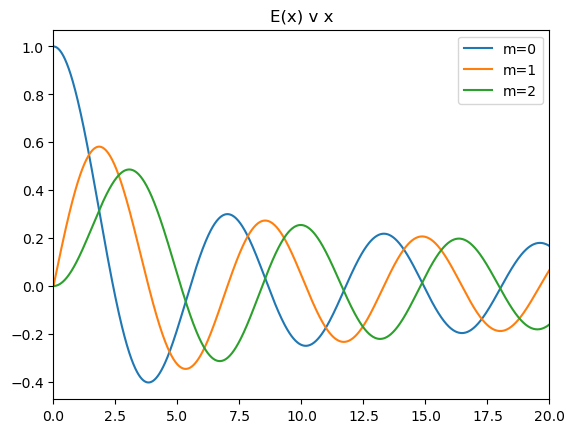

In [3]:
#Define Constants and Variables
N = 1000
x1 = 0
x2 = 20
a = 0
b = pi
xvals = linspace(x1,x2,N+1)          #needed for nicer graphing

#Define integrand of Besself Function
def f(theta):
    return cos(m*theta-x*sin(theta))

#Def Bessel Function
def J(m,x,f,N):        #why does this work?
    return (1/pi)*simpson(f,N)

#Calculate Values of J0-J2
for m in range(0,3):
    Jvals = list()
    for x in xvals:
        Jvals.append(J(m,x,f,N))
    plt.plot(xvals,Jvals,label='m='+str(m))

plt.xlim(x1,x2)
plt.title(f'E(x) v x')
plt.legend()

b) Make a density plot of the intensity of the circular diffraction pattern of a point light source with $\lambda = 500nm$  
from the values of $r$ from $0$ to $1 \mu m$.

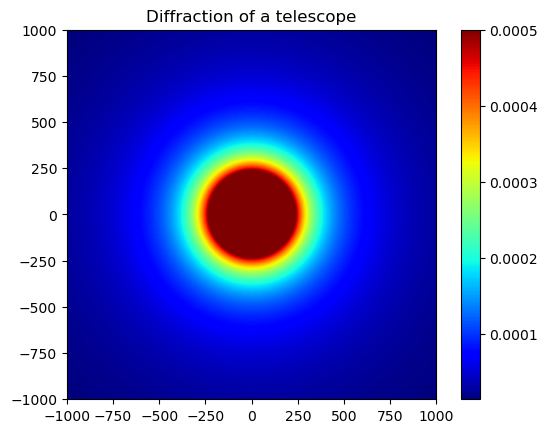

In [4]:
m = 1                             #m does not vary with intensity function
wvlength = 500e-9                    #wavelength in nm
k = (2*pi)/wvlength
lim = 1e-6                         #this is the limit we want our axis to be in nm
amnt = 500
xval = linspace(-lim,lim,amnt)
yval = xval
Intensity = zeros([amnt,amnt],float)       #array for intensity

for i in range(len(xval)):
    for j in range(len(yval)):        
        r = sqrt(xval[i]**2+yval[j]**2)
        kr = k*r
        if kr == 0:
            value = 0.25
        else:
            value = (J(1,kr,f,N)/kr)**2
        Intensity[i,j] = value

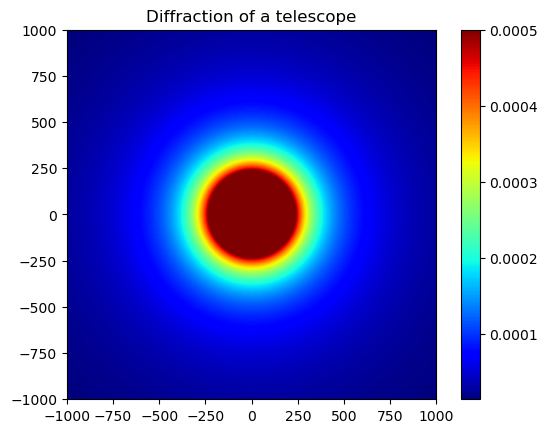

In [5]:
plt.title("Diffraction of a telescope")
plt.imshow(Intensity,vmax=0.0005,extent=(-N,N,-N,N))
plt.set_cmap("jet")
plt.colorbar()
plt.show()